In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from tabulate import tabulate
from astropy.time import Time
from tqdm import tqdm
import csv

In [2]:
with open('drift_space.pkl', 'rb') as f:

    drift_space = pickle.load(f) # deserialize using load()
    
print(drift_space.shape)

#signal_index = np.array(df["signal_index"]).tolist()
#tstart = np.array(df["tstart"])
#source_name = np.array(df["sourceName"]).tolist()

(114174, 24)


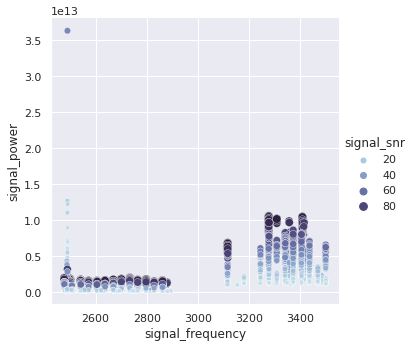

In [3]:
sns.set_theme()
sns.relplot(data=drift_space, x=drift_space["signal_frequency"], y=drift_space["signal_power"], 
            hue=drift_space["signal_snr"], size = drift_space["signal_snr"], palette = "ch:s=.25,rot=-.25")
plt.savefig('drift_space.png', bbox_inches='tight', transparent = True)

In [88]:
#display(np.array(drift_space['sourceName'])[0])
array = np.array(drift_space['sourceName'])
sourceName = np.array([int(x) for x in array])
print(len(sourceName))

source_name = drift_space['sourceName']
unique_source_name = np.unique(source_name)
print(unique_source_name[0])

length_of_sources = []
for i in tqdm(range(len(unique_source_name))):
    source = drift_space.loc[drift_space['sourceName'] == unique_source_name[i]] #select each subset
    x = unique_source_name[i]
    #print(np.count_nonzero(array == int(x)))
    length_of_sources.append(np.count_nonzero(array == int(x)))

114174
10130217239302528


100%|██████████| 829/829 [00:08<00:00, 103.30it/s]


In [15]:
source = 'prelim_kurt_bins.csv'
#csv.reader(source)

file = open(source)

with open(source, newline='') as f:
    reader = csv.reader(f)
    row1 = next(reader)
    
print(row1)

data = pd.read_csv(source)

['rfi_freq_bin_bots', 'rfi_freq_bin_tops']


In [16]:
lower_freq_bin = [float(x) for x in data['rfi_freq_bin_bots'] if str(x) != 'nan']
upper_freq_bin = [float(x) for x in data['rfi_freq_bin_tops'] if str(x) != 'nan']

In [67]:
signal_frequency = np.array(drift_space['signal_frequency']).tolist()
print(len(signal_frequency))

discarded_frequencies = []
for i in tqdm(range(len(sourceName))):
#for i in range(100):
    #print(signal_frequency[i])
    for j in range(len(lower_freq_bin)):
        if signal_frequency[i] > lower_freq_bin[j] and signal_frequency[i] < upper_freq_bin[j]:
            discarded_frequencies.append(i)
print(discarded_frequencies[0:5])

114174


100%|██████████| 114174/114174 [00:02<00:00, 43517.69it/s]

[0, 1, 2, 3, 55]


In [78]:
kept_frequencies = list(set(range(len(signal_frequency))) - set(discarded_frequencies))

In [86]:
df1 = pd.DataFrame({"file_path":[],
                    "hit_file_enumeration":[],
                    "signal_frequency":[],
                    "signal_index":[],
                    "signal_driftSteps":[],
                    "signal_driftRate":[],
                    "signal_snr":[],
                    "signal_coarseChannel":[],
                    "signal_numTimesteps":[],
                    "signal_power":[],
                    "signal_incoherentPower":[],
                    "sourceName":[],
                    "fch1":[],
                    "foff":[],
                    "tstart":[],
                    "tsamp":[],
                    "ra":[],
                    "dec":[],
                    "telescopeId":[],
                    "numTimesteps":[],
                    "numChannels":[],
                    "coarseChannel":[],
                    "startChannel":[],
                    "beam":[]})

for i in tqdm(range(len(sourceName))):
    new_source = drift_space.loc[sourceName == sourceName[i]] #select each subset
    
    if i in kept_frequencies:
        appending_rows = new_source.loc[i]
    
        #display(appending_rows)
        df1 = df1.append(appending_rows, ignore_index = True)
display(df1)

100%|██████████| 114174/114174 [18:43<00:00, 101.66it/s]


,file_path,hit_file_enumeration,signal_frequency,signal_index,signal_driftSteps,signal_driftRate,signal_snr,signal_coarseChannel,signal_numTimesteps,signal_power,...,tstart,tsamp,ra,dec,telescopeId,numTimesteps,numChannels,coarseChannel,startChannel,beam
0,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,265.0,2487.361481,47380.0,-12.0,-11.087174,10.067541,10.0,64.0,3.083943e+11,...,60006.080477,0.131072,3.46006,8.24895,0.0,64.0,91.0,10.0,47328.0,2.0
1,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,285.0,2488.824272,108039.0,1.0,0.923931,9.292659,11.0,64.0,2.707338e+11,...,60006.080477,0.131072,3.46006,8.24895,0.0,64.0,80.0,11.0,107999.0,2.0
2,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,293.0,2491.760864,99728.0,25.0,23.098278,9.259498,14.0,64.0,3.102176e+11,...,60006.080477,0.131072,3.46006,8.24895,0.0,64.0,104.0,14.0,99688.0,2.0
3,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,321.0,2502.645248,84574.0,0.0,0.000000,8.156948,25.0,64.0,2.340233e+11,...,60006.080477,0.131072,3.46006,8.24895,0.0,64.0,79.0,25.0,84534.0,2.0
4,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,322.0,2502.648300,84974.0,0.0,0.000000,9.378388,25.0,64.0,2.560867e+11,...,60006.080477,0.131072,3.46006,8.24895,0.0,64.0,79.0,25.0,84934.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105026,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,73.0,3436.764023,100142.0,0.0,0.000000,57.193813,31.0,64.0,6.500899e+12,...,60006.147386,0.131072,3.60406,11.67010,0.0,64.0,79.0,31.0,100102.0,2.0
105027,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,74.0,3436.797371,104513.0,0.0,0.000000,31.485077,31.0,64.0,3.804582e+12,...,60006.147386,0.131072,3.60406,11.67010,0.0,64.0,79.0,31.0,104473.0,2.0
105028,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,75.0,3436.799904,104845.0,0.0,0.000000,34.453175,31.0,64.0,4.115874e+12,...,60006.147386,0.131072,3.60406,11.67010,0.0,64.0,79.0,31.0,104805.0,2.0
105029,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,76.0,3436.826302,108305.0,0.0,0.000000,42.857834,31.0,64.0,4.997350e+12,...,60006.147386,0.131072,3.60406,11.67010,0.0,64.0,79.0,31.0,108265.0,2.0


In [90]:
with open('drift_space_kurtosis.pkl', 'wb') as f:  # open a text file
    pickle.dump(df1, f) # serialize the list
f.close()

In [5]:
with open('drift_space_kurtosis.pkl', 'rb') as f:

    drift_space_kurtosis = pickle.load(f) # deserialize using load()

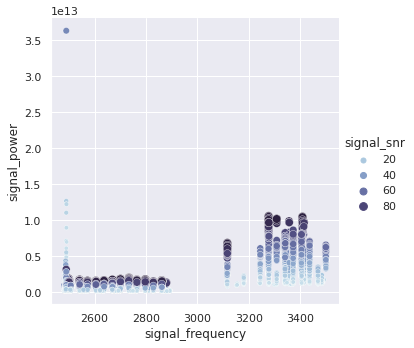

In [7]:
sns.set_theme()
sns.relplot(data=drift_space_kurtosis, x=drift_space_kurtosis["signal_frequency"], y=drift_space_kurtosis["signal_power"], 
            hue=drift_space_kurtosis["signal_snr"], size = drift_space_kurtosis["signal_snr"], palette = "ch:s=.25,rot=-.25")
plt.savefig('drift_space_kurtosis.png', bbox_inches='tight', transparent = True)

In [25]:
with open('drift_time_1.pkl', 'rb') as f:

    drift_time_1 = pickle.load(f) # deserialize using load()
    
print(drift_time_1.shape)
    
with open('drift_time_2.pkl', 'rb') as f:

    drift_time_2 = pickle.load(f) # deserialize using load()
    
print(drift_time_2.shape)

(53899, 24)
(60275, 24)


In [35]:
source_name_1 = np.array(drift_time_1["sourceName"])
unique_source_name_1 = np.unique(source_name_1)
print(source_name_1.tolist().count(unique_source_name_1[2]))

source_name_2 = np.array(drift_time_2["sourceName"])
unique_source_name_2 = np.unique(source_name_2)
print(source_name_2.tolist().count(unique_source_name_2[2]))

field_of_view = np.array(drift_space["file_path"])
start_time = np.array(drift_space["tstart"])

print(len(unique_source_name_1))
print(len(unique_source_name_2))

40
29
829
829


In [27]:
signal_frequency_1 = np.array(drift_time_1['signal_frequency']).tolist()
print(len(signal_frequency_1))

discarded_frequencies_1 = []
for i in tqdm(range(len(source_name_1))):
#for i in range(100):
    #print(signal_frequency[i])
    for j in range(len(lower_freq_bin)):
        if signal_frequency_1[i] > lower_freq_bin[j] and signal_frequency_1[i] < upper_freq_bin[j]:
            discarded_frequencies_1.append(i)
print(discarded_frequencies_1[0:5])

signal_frequency_2 = np.array(drift_time_2['signal_frequency']).tolist()
print(len(signal_frequency_2))

discarded_frequencies_2 = []
for i in tqdm(range(len(source_name_2))):
#for i in range(100):
    #print(signal_frequency[i])
    for j in range(len(lower_freq_bin)):
        if signal_frequency_2[i] > lower_freq_bin[j] and signal_frequency_2[i] < upper_freq_bin[j]:
            discarded_frequencies_2.append(i)
print(discarded_frequencies_2[0:5])

kept_frequencies_1 = list(set(range(len(signal_frequency_1))) - set(discarded_frequencies_1))

kept_frequencies_2 = list(set(range(len(signal_frequency_2))) - set(discarded_frequencies_2))

print(len(kept_frequencies_2))

53899


100%|██████████| 53899/53899 [00:01<00:00, 35948.35it/s]


[0, 1, 2, 3, 51]
60275


100%|██████████| 60275/60275 [00:01<00:00, 36563.88it/s]

[4, 89, 90, 91, 121]
55049


In [29]:
drift_time_kurtosis_2 = pd.DataFrame({"file_path":[],
                                      "hit_file_enumeration":[],
                                    "signal_frequency":[],
                                    "signal_index":[],
                                    "signal_driftSteps":[],
                                    "signal_driftRate":[],
                                    "signal_snr":[],
                                    "signal_coarseChannel":[],
                                    "signal_numTimesteps":[],
                                    "signal_power":[],
                                    "signal_incoherentPower":[],
                                    "sourceName":[],
                                    "fch1":[],
                                    "foff":[],
                                    "tstart":[],
                                    "tsamp":[],
                                    "ra":[],
                                    "dec":[],
                                    "telescopeId":[],
                                    "numTimesteps":[],
                                    "numChannels":[],
                                    "coarseChannel":[],
                                    "startChannel":[],
                                    "beam":[]})

#for i in tqdm(range(len(source_name_2))):
    #new_source = drift_time_2.loc[source_name_2 == source_name_2[i]] #select each subset
    
    #if i in kept_frequencies_2:
        #appending_rows = new_source.loc[i]
    
        #display(appending_rows)
        #drift_time_kurtosis_2 = drift_time_kurtosis_2.append(appending_rows, ignore_index = True)
        
appending_rows = drift_time_2.iloc[kept_frequencies_2]
drift_time_kurtosis_2 = drift_time_kurtosis_2.append(appending_rows, ignore_index = True)
display(drift_time_kurtosis_2)

,file_path,hit_file_enumeration,signal_frequency,signal_index,signal_driftSteps,signal_driftRate,signal_snr,signal_coarseChannel,signal_numTimesteps,signal_power,...,tstart,tsamp,ra,dec,telescopeId,numTimesteps,numChannels,coarseChannel,startChannel,beam
0,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,279.0,2505.482574,63252.0,-18.0,-16.630760,14.918583,28.0,64.0,3.542508e+11,...,60006.083918,0.131072,3.46006,8.24895,0.0,64.0,97.0,28.0,63194.0,3.0
1,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,282.0,2505.480942,63038.0,25.0,23.098278,13.593712,28.0,64.0,3.302722e+11,...,60006.083918,0.131072,3.46006,8.24895,0.0,64.0,104.0,28.0,62998.0,3.0
2,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,290.0,2507.253281,33198.0,0.0,0.000000,9.043954,30.0,64.0,2.377517e+11,...,60006.083918,0.131072,3.46006,8.24895,0.0,64.0,79.0,30.0,33158.0,3.0
3,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,294.0,2507.256310,33595.0,1.0,0.923931,26.407808,30.0,64.0,5.355064e+11,...,60006.083918,0.131072,3.46006,8.24895,0.0,64.0,80.0,30.0,33555.0,3.0
4,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,332.0,2557.402290,52729.0,0.0,0.000000,10.918045,16.0,64.0,2.465902e+11,...,60006.083918,0.131072,3.46006,8.24895,0.0,64.0,79.0,16.0,52689.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55044,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,73.0,3436.764023,100142.0,0.0,0.000000,57.193813,31.0,64.0,6.500899e+12,...,60006.147386,0.131072,3.60406,11.67010,0.0,64.0,79.0,31.0,100102.0,2.0
55045,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,74.0,3436.797371,104513.0,0.0,0.000000,31.485077,31.0,64.0,3.804582e+12,...,60006.147386,0.131072,3.60406,11.67010,0.0,64.0,79.0,31.0,104473.0,2.0
55046,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,75.0,3436.799904,104845.0,0.0,0.000000,34.453175,31.0,64.0,4.115874e+12,...,60006.147386,0.131072,3.60406,11.67010,0.0,64.0,79.0,31.0,104805.0,2.0
55047,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,76.0,3436.826302,108305.0,0.0,0.000000,42.857834,31.0,64.0,4.997350e+12,...,60006.147386,0.131072,3.60406,11.67010,0.0,64.0,79.0,31.0,108265.0,2.0


In [30]:
with open('drift_time_kurtosis_2.pkl', 'wb') as f:  # open a text file
    pickle.dump(drift_time_kurtosis_2, f) # serialize the list
f.close()

In [31]:
with open('drift_time_kurtosis_1.pkl', 'rb') as f:

    drift_time_1 = pickle.load(f) # deserialize using load()
    
print(drift_time_1.shape)
    
with open('drift_time_kurtosis_2.pkl', 'rb') as f:

    drift_time_2 = pickle.load(f) # deserialize using load()
    
print(drift_time_2.shape)

(49982, 24)
(55049, 24)


In [32]:
def countFreq(arr, n):
    
    # Mark all array elements as not visited
    visited = [False for i in range(n)]
    fp_list = []
    # Traverse through array elements and count frequencies
    for i in range(n):
         
        # Skip this element if already processed
        if (visited[i] == True):
            continue
 
        # Count frequency
        count = 1
        for j in range(i + 1, n, 1):
            if (arr[i] == arr[j]):
                visited[j] = True
                count += 1
         
        #print(count)
        fp_list.append(count)
    return len(fp_list)

Here we want to loop through all of the unique sources and go through all of their frequencies to see which ones could be artifically drifting signals 

In [16]:
driftRate = []
timeDiffs = []
freqDiffs = []
powDiffs = []
driftRates = pd.DataFrame({"Source Name 1":[], #Gaia name of the source
                           "Drift Rate":[], #Coherent or incoherent beam
                           "Time Difference":[], 
                           "Frequency Difference":[],
                           "Power Difference":[]})
for i in tqdm(range(len(unique_source_name)-1)):
#for i in range(2):
    source_1 = drift_time_1.loc[source_name_1 == unique_source_name_1[i]] #select each subset
    source_2 = drift_time_2.loc[source_name_2 == unique_source_name_2[i]] #select each subset
    #print(len(source))
    
    frequency_1 = np.array(source_1["signal_frequency"])
    start_time_1 = np.array(source_1["tstart"])
    power_1 = np.array(source_1["signal_power"])
    
    frequency_2 = np.array(source_2["signal_frequency"])
    start_time_2 = np.array(source_2["tstart"])
    power_2 = np.array(source_2["signal_power"])
    
    DriftRate = []
    FrequencyDifference = []
    PowerDifference = []
    
    time_diff = (start_time_2[0] - start_time_1[0])*24*60*60
    
    for x in range(len(source_1)):
        for y in range(len(source_2)):
            freq_diff = (frequency_1[x]/frequency_2[y])*1e6
            pow_diff = ((power_2[y]-power_1[x])/((power_1[x] + power_2[y])/2))*100

            drift = freq_diff/time_diff
            
            if np.abs(pow_diff) < 20:
                if np.abs(drift) < 3000:
                    DriftRate.append(drift)
                    FrequencyDifference.append(freq_diff)
                    PowerDifference.append(pow_diff)
    
    TimeDifference = np.full(len(DriftRate), time_diff)
    
    #print(len(TimeDifference), len(DriftRate), len(FrequencyDifference), len(PowerDifference))
    
    for j in range(len(DriftRate)):
        new_row = [unique_source_name_1[i], DriftRate[j], TimeDifference[j], FrequencyDifference[j], PowerDifference[j]]
        #print(new_row)

        driftRates.loc[len(driftRates.index)] = new_row

display(driftRates)

100%|██████████| 828/828 [00:52<00:00, 15.62it/s]


,Source Name 1,Drift Rate,Time Difference,Frequency Difference,Power Difference
0,10130217239302528,2911.636166,297.359844,865803.674742,17.682116
1,10130217239302528,2910.618979,297.359844,865501.204286,17.682116
2,10130217239302528,2911.998979,297.359844,865911.560841,4.686887
3,10130217239302528,2911.452588,297.359844,865749.086027,-18.763008
4,10130217239302528,2912.078743,297.359844,865935.279517,-13.255659
...,...,...,...,...,...
14150,36706134839099264,2915.150607,286.548597,835332.315499,15.604261
14151,36706890753335808,2649.053260,286.548597,759082.494149,-0.709484
14152,36706890753335808,2650.095379,286.548597,759381.111777,-0.709484
14153,36706890753335808,2981.920610,286.548597,854465.166014,16.133993


In [17]:
print(np.min(np.abs(driftRates["Drift Rate"])))
print(np.array(driftRates["Drift Rate"]).tolist().index(np.min(np.abs(driftRates["Drift Rate"]))))
print(np.max(driftRates["Time Difference"]))

1391.8428139196087
3050
569.0236687660217


In [62]:
driftRate = []
timeDiffs = []
freqDiffs = []
powDiffs = []

driftRates = pd.DataFrame({"Source Name":[], #Gaia name of the source
                           "Drift Rate":[], #Coherent or incoherent beam
                           "Time Difference":[], 
                           "Frequency 1":[],
                           "Frequency 2":[],
                           "Frequency Difference":[],
                           "Power 1":[],
                           "Power 2":[],
                           "Power Difference":[],
                           "Start Time 1":[],
                           "Start Time 2":[]})
#for i in tqdm(range(len(unique_source_name_1))):
for i in range(6):
    source_1 = drift_time_1.loc[source_name_1 == unique_source_name_1[i]] #select each subset
    source_2 = drift_time_2.loc[source_name_2 == unique_source_name_1[i]] #select each subset
    
    frequency_1 = np.array(source_1["signal_frequency"])
    start_time_1 = np.array(source_1["tstart"])
    power_1 = np.array(source_1["signal_power"])
    
    frequency_2 = np.array(source_2["signal_frequency"])
    start_time_2 = np.array(source_2["tstart"])
    power_2 = np.array(source_2["signal_power"])
    
    DriftRate = []
    FrequencyDifference = []
    PowerDifference = []
    
    freq_1 = []
    freq_2 = []
    pow_1 = []
    pow_2 = []
    
    time_diff = (start_time_2[0] - start_time_1[0])*24*60*60 #the time between the two observations
    maximum_drift = time_diff*100 #assuming a maximum drift rate of 100 Hz/s, the maximum a signal could have drifted

    for x in range(len(source_1)):
        for y in range(len(source_2)):
            freq_diff = (frequency_1[x]-frequency_2[y])*1e6
            pow_diff = ((power_2[y]-power_1[x])/((power_1[x] + power_2[y])/2))*100

            drift = freq_diff/time_diff
            
            if np.abs(freq_diff) < maximum_drift:
                if np.abs(pow_diff) < 20:
                    DriftRate.append(drift)
                    FrequencyDifference.append(freq_diff)
                    PowerDifference.append(pow_diff)
                    
                    freq_1.append(frequency_1[x])
                    freq_2.append(frequency_2[y])
                    pow_1.append(power_1[x])
                    pow_2.append(power_2[y])
    
    TimeDifference = np.full(len(DriftRate), time_diff)
    
    #print(len(TimeDifference), len(DriftRate), len(FrequencyDifference), len(PowerDifference))
    
    for j in range(len(DriftRate)):
        new_row = [unique_source_name_1[i], DriftRate[j], TimeDifference[j], freq_1[j], freq_2[j], FrequencyDifference[j], 
                   pow_1[j], pow_2[j], PowerDifference[j], start_time_1[0], start_time_2[0]]

        driftRates.loc[len(driftRates.index)] = new_row

display(driftRates)

,Source Name,Drift Rate,Time Difference,Frequency 1,Frequency 2,Frequency Difference,Power 1,Power 2,Power Difference,Start Time 1,Start Time 2
0,10130217239302528,-72.737910,297.359844,2505.460945,2505.482574,-21629.333496,3.753997e+11,3.542508e+11,-5.797010,60006.080477,60006.083918
1,10130217239302528,-67.247288,297.359844,2505.460945,2505.480942,-19996.643066,3.753997e+11,3.302722e+11,-12.789946,60006.080477,60006.083918
2,10130217239302528,-76.073334,297.359844,2505.459953,2505.482574,-22621.154785,3.702758e+11,3.542508e+11,-4.423577,60006.080477,60006.083918
3,10130217239302528,-70.582713,297.359844,2505.459953,2505.480942,-20988.464355,3.702758e+11,3.302722e+11,-11.420650,60006.080477,60006.083918
4,10130217239302528,-75.329278,297.359844,2557.379890,2557.402290,-22399.902344,2.599866e+11,2.465902e+11,-5.288989,60006.080477,60006.083918
5,10130217239302528,0.000000,297.359844,2557.402290,2557.402290,0.000000,2.568368e+11,2.465902e+11,-4.070747,60006.080477,60006.083918
6,10130217239302528,-75.996363,297.359844,2557.402290,2557.424889,-22598.266602,2.568368e+11,2.440471e+11,-5.106843,60006.080477,60006.083918
7,10130217239302528,76.073334,297.359844,2557.424911,2557.402290,22621.154785,2.485333e+11,2.465902e+11,-0.784912,60006.080477,60006.083918
8,10130217239302528,0.076971,297.359844,2557.424911,2557.424889,22.888184,2.485333e+11,2.440471e+11,-1.821510,60006.080477,60006.083918
9,10130217239302528,-0.051314,297.359844,2733.342751,2733.342766,-15.258789,5.936746e+11,6.257250e+11,5.256748,60006.080477,60006.083918


In [105]:
print(np.max(np.array(driftRates["Time Difference"])))

569.0236687660217


In [106]:
with open('drift_rate_kurtosis.pkl', 'wb') as f:  # open a text file
    pickle.dump(driftRates, f) # serialize the list
f.close()

12


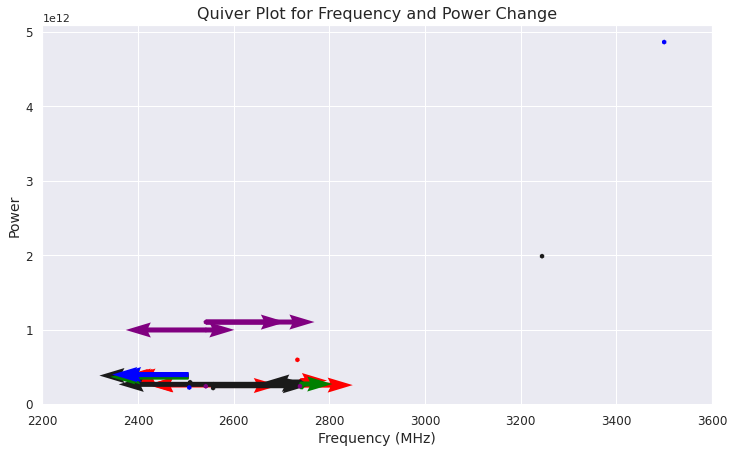

In [80]:
# Creating arrow
x_pos = driftRates['Frequency 1']
y_pos = driftRates['Power 1']
x_direct = driftRates['Frequency Difference']
y_direct = driftRates['Power Difference']
source = np.unique(np.array(driftRates['Source Name']))
#source = [int(x)/int(np.max(np.array(driftRates['Source Name']))) for x in source]

print(np.count_nonzero(np.array(x_direct) == 0.0000))

# Creating plot
fig, ax = plt.subplots(figsize = (12, 7))

ax.quiver(x_pos[0:14], y_pos[0:14], x_direct[0:14], y_direct[0:14], color = 'red')
ax.quiver(x_pos[14:25], y_pos[14:25], x_direct[14:25], y_direct[14:25])
ax.quiver(x_pos[25:30], y_pos[25:30], x_direct[25:30], y_direct[25:30], color = 'green')
ax.quiver(x_pos[30:38], y_pos[30:38], x_direct[30:38], y_direct[30:38], color = 'purple')
ax.quiver(x_pos[38:42], y_pos[38:42], x_direct[38:42], y_direct[38:42], color = 'blue')
#ax.quiver(x_pos[42:47], y_pos[42:47], x_direct[42:47], y_direct[42:47], color = 'orange')

#ax.quiver(x_pos[42:48], y_pos[42:48], x_direct[42:48], y_direct[42:48], color = 'yellow')

ax.set_title('Quiver Plot for Frequency and Power Change', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Frequency (MHz)', fontsize = 14)
plt.ylabel('Power', fontsize = 14)
plt.xlim(2200, 3600)
#plt.grid()

# Show plot
plt.show()

In [265]:
with open('drift_rate_kurtosis.pkl', 'rb') as f:

    drift_time = pickle.load(f) # deserialize using load()
    
print(drift_time.shape)

(7906, 11)


In [257]:
driftRates = pd.DataFrame({"Source Name":[], #Gaia name of the source
                           "Drift Rate":[], #Coherent or incoherent beam
                           "Time Difference":[], 
                           "Frequency 1":[],
                           "Frequency 2":[],
                           "Frequency Difference":[],
                           "Power 1":[],
                           "Power 2":[],
                           "Power Difference":[],
                           "Start Time 1":[],
                           "Start Time 2":[]})

source_name = np.array(drift_time["Source Name"])

for i in tqdm(range(len(source_name))):
    new_source = drift_time.loc[source_name == source_name[i]] #select each subset
    
    if np.array(drift_time["Drift Rate"])[i] != 0:
        appending_rows = new_source.loc[i]
    
            #display(appending_rows)
        driftRates = driftRates.append(appending_rows, ignore_index = True)
    else:
        continue

display(driftRates)

with open('drift_rate_kurtosis_nonzero.pkl', 'wb') as f:  # open a text file
    pickle.dump(driftRates, f) # serialize the list
f.close()

100%|██████████| 7906/7906 [00:15<00:00, 494.31it/s]


,Source Name,Drift Rate,Time Difference,Frequency 1,Frequency 2,Frequency Difference,Power 1,Power 2,Power Difference,Start Time 1,Start Time 2
0,10130217239302528,-72.737910,297.359844,2505.460945,2505.482574,-21629.333496,3.753997e+11,3.542508e+11,-5.797010,60006.080477,60006.083918
1,10130217239302528,-67.247288,297.359844,2505.460945,2505.480942,-19996.643066,3.753997e+11,3.302722e+11,-12.789946,60006.080477,60006.083918
2,10130217239302528,-76.073334,297.359844,2505.459953,2505.482574,-22621.154785,3.702758e+11,3.542508e+11,-4.423577,60006.080477,60006.083918
3,10130217239302528,-70.582713,297.359844,2505.459953,2505.480942,-20988.464355,3.702758e+11,3.302722e+11,-11.420650,60006.080477,60006.083918
4,10130217239302528,-75.329278,297.359844,2557.379890,2557.402290,-22399.902344,2.599866e+11,2.465902e+11,-5.288989,60006.080477,60006.083918
...,...,...,...,...,...,...,...,...,...,...,...
5229,37454489939772800,13.773197,152.330898,2742.266945,2742.264847,2098.083496,2.279505e+11,2.480468e+11,8.443881,60006.145623,60006.147386
5230,37456066191234048,12.270667,152.330898,2505.458298,2505.456429,1869.201660,3.818168e+11,3.909892e+11,2.373796,60006.145623,60006.147386
5231,37456066191234048,0.150253,152.330898,2620.799911,2620.799889,22.888184,2.196062e+11,2.209348e+11,0.603135,60006.145623,60006.147386
5232,37456066191234048,13.773197,152.330898,2742.266945,2742.264847,2098.083496,2.638065e+11,2.734394e+11,3.586045,60006.145623,60006.147386


In [170]:
with open('drift_rate_kurtosis_nonzero.pkl', 'rb') as f:

    drift_time_nonzero = pickle.load(f) # deserialize using load()
    
print(drift_time_nonzero.shape)

print(len(drift_time_nonzero["Source Name"]))
#mini_source_name = np.array(drift_time_zero["Source Name"])

display(drift_time_nonzero)

(3557, 11)
3557


,Source Name,Drift Rate,Time Difference,Frequency 1,Frequency 2,Frequency Difference,Power 1,Power 2,Power Difference,Start Time 1,Start Time 2
0,10130217239302528,0.076971,297.359844,2557.424911,2557.424889,22.888184,2.485333e+11,2.440471e+11,-1.821510,60006.080477,60006.083918
1,10130217239302528,-0.051314,297.359844,2733.342751,2733.342766,-15.258789,5.936746e+11,6.257250e+11,5.256748,60006.080477,60006.083918
2,10130217239302528,29.787906,297.359844,2741.508026,2741.499168,8857.727051,3.151981e+11,2.741978e+11,-13.912665,60006.080477,60006.083918
3,10130217239302528,-0.051314,297.359844,2741.508026,2741.508041,-15.258789,3.151981e+11,3.252848e+11,3.149700,60006.080477,60006.083918
4,10130217239302528,-0.051314,297.359844,2741.499153,2741.499168,-15.258789,2.529159e+11,2.741978e+11,8.074880,60006.080477,60006.083918
...,...,...,...,...,...,...,...,...,...,...,...
3552,37454489939772800,13.773197,152.330898,2742.266945,2742.264847,2098.083496,2.279505e+11,2.480468e+11,8.443881,60006.145623,60006.147386
3553,37456066191234048,12.270667,152.330898,2505.458298,2505.456429,1869.201660,3.818168e+11,3.909892e+11,2.373796,60006.145623,60006.147386
3554,37456066191234048,0.150253,152.330898,2620.799911,2620.799889,22.888184,2.196062e+11,2.209348e+11,0.603135,60006.145623,60006.147386
3555,37456066191234048,13.773197,152.330898,2742.266945,2742.264847,2098.083496,2.638065e+11,2.734394e+11,3.586045,60006.145623,60006.147386


In [258]:
newDriftRates = pd.DataFrame({"Source Name":[], #Gaia name of the source
                           "Drift Rate":[], #Coherent or incoherent beam
                           "Time Difference":[], 
                           "Frequency 1":[],
                           "Frequency 2":[],
                           "Frequency Difference":[],
                           "Power 1":[],
                           "Power 2":[],
                           "Power Difference":[],
                           "Start Time 1":[],
                           "Start Time 2":[]})

unique_source = np.unique(source_name)

for i in tqdm(range(len(source_name))):
#for i in range(42,48):
    new_source = drift_time.loc[source_name == source_name[i]] #select each subset

    #print(source_name[i])
    indices = [x for x in range(len(mini_source_name)) if mini_source_name[x] == source_name[i]]
    #print(np.array(drift_time_zero["Frequency 1"])[indices])

    for j in range(len(mini_source_name)):
        if source_name[i] == mini_source_name[j]:
            #print('yes')
            if np.array(drift_time["Frequency 1"])[i] not in np.array(drift_time_zero["Frequency 1"])[indices]:
                if np.array(drift_time["Frequency 2"])[i] not in np.array(drift_time_zero["Frequency 1"])[indices]:
                    appending_rows = new_source.loc[i]
                    #print(len(appending_rows))

                    newDriftRates = newDriftRates.append(appending_rows, ignore_index = True)
                else:
                    continue
            else:
                continue
        else:
            continue
            #elif source_name[i] != mini_source_name[j]:
                #appending_rows = new_source.loc[i]

                #display(appending_rows)
                #newDriftRates = newDriftRates.append(appending_rows, ignore_index = True)
newDriftRates = newDriftRates.drop_duplicates(ignore_index = True)
display(newDriftRates)

100%|██████████| 7906/7906 [02:02<00:00, 64.53it/s] 


,Source Name,Drift Rate,Time Difference,Frequency 1,Frequency 2,Frequency Difference,Power 1,Power 2,Power Difference,Start Time 1,Start Time 2
0,10130217239302528,-72.737910,297.359844,2505.460945,2505.482574,-21629.333496,3.753997e+11,3.542508e+11,-5.797010,60006.080477,60006.083918
1,10130217239302528,-67.247288,297.359844,2505.460945,2505.480942,-19996.643066,3.753997e+11,3.302722e+11,-12.789946,60006.080477,60006.083918
2,10130217239302528,-76.073334,297.359844,2505.459953,2505.482574,-22621.154785,3.702758e+11,3.542508e+11,-4.423577,60006.080477,60006.083918
3,10130217239302528,-70.582713,297.359844,2505.459953,2505.480942,-20988.464355,3.702758e+11,3.302722e+11,-11.420650,60006.080477,60006.083918
4,10130217239302528,0.076971,297.359844,2557.424911,2557.424889,22.888184,2.485333e+11,2.440471e+11,-1.821510,60006.080477,60006.083918
...,...,...,...,...,...,...,...,...,...,...,...
3811,37448958021915904,0.074336,205.267324,2749.355309,2749.355293,15.258789,2.528716e+11,2.345298e+11,-7.526338,60006.147483,60006.149859
3812,37456066191234048,12.270667,152.330898,2505.458298,2505.456429,1869.201660,3.818168e+11,3.909892e+11,2.373796,60006.145623,60006.147386
3813,37456066191234048,0.150253,152.330898,2620.799911,2620.799889,22.888184,2.196062e+11,2.209348e+11,0.603135,60006.145623,60006.147386
3814,37456066191234048,13.773197,152.330898,2742.266945,2742.264847,2098.083496,2.638065e+11,2.734394e+11,3.586045,60006.145623,60006.147386


In [259]:
with open('nonzero_drift_rates.pkl', 'wb') as f:  # open a text file
    pickle.dump(newDriftRates, f) # serialize the list
f.close()

In [268]:
with open('nonzero_drift_rates.pkl', 'rb') as f:

    nonzero_drift_rates = pickle.load(f) # deserialize using load()
    
print(nonzero_drift_rates.shape)
print(len(np.unique(np.array(nonzero_drift_rates["Source Name"]))))

(3816, 11)
622


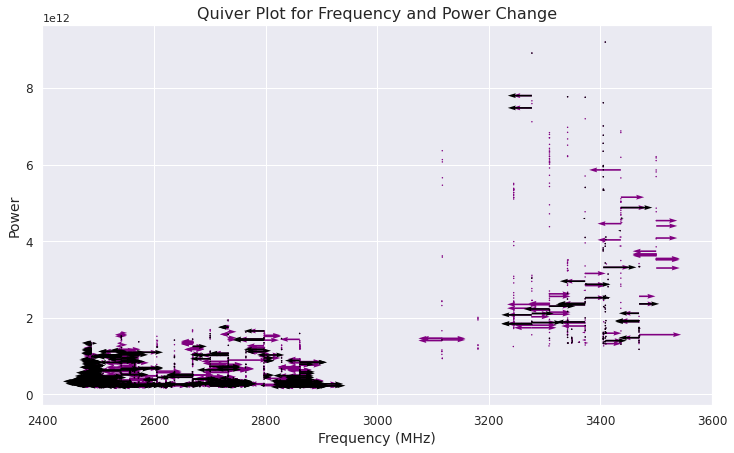

(7906, 11)


In [267]:
# Creating arrow
x_pos = nonzero_drift_rates['Frequency 1']
y_pos = nonzero_drift_rates['Power 1']
x_direct = nonzero_drift_rates['Frequency Difference']
y_direct = nonzero_drift_rates['Power Difference']

# Creating arrow
x_position = drift_time['Frequency 1']
y_position = drift_time['Power 1']
x_direction = drift_time['Frequency Difference']
y_direction = drift_time['Power Difference']

# Creating plot
fig, ax = plt.subplots(figsize = (12, 7))

ax.quiver(x_position, y_position, x_direction, y_direction, color = 'purple')
ax.quiver(x_pos, y_pos, x_direct, y_direct, color = 'black')

#ax.quiver(x_pos[42:48], y_pos[42:48], x_direct[42:48], y_direct[42:48], color = 'yellow')

ax.set_title('Quiver Plot for Frequency and Power Change', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Frequency (MHz)', fontsize = 14)
plt.ylabel('Power', fontsize = 14)
plt.xlim(2400, 3600)
#plt.grid()

# Show plot
plt.show()
print(drift_time.shape)